## Chapter 8

* 많은 특성은 훈련을 느리게 하고 좋은 솔루션을 찾기 힘들게 함(차원의 저주).
  * MNIST 숫자 이미지 같은 경우, 배경의 하얀 부분은 크게 중요하지 않아 제거할 수 있음.
  * 두 픽셀 사이 강도를 하나로 표현하는것도 방법.
* 차원 축소 시 데이터 시각화에도 용이.

> 차원 축소 시, 일부 정보가 유실될 수 있어 속도는 빨라지지만 성능이 나빠짐. 또한, 파이프라인이 복잡해지고 관리가 힘들어짐. 단, 잡음 등이 제거되어 성능이 올라갈 수도 있음.

### 차원의 저주

* 고차원의 데이터셋은 매우 희박, 즉 서로 멀리 떨어져있음. 새로운 샘플도 훈련 세트와 멀리 떨어져있을 가능성이 크고 저차원일 때 보다 예측이 불안정함.
  * 과대적합의 위험이 큼.
* 이를 해결하기 위해서는 훈련 세트의 크기를 늘리는 것이지만, 차원 수가 커질수록 필요로 하는 데이터셋의 수는 기하급수적으로 증가.

### 차원 축소 방법

#### 투영

* 대부분의 경우 훈련 샘플은 모든 차원에 균일하게 퍼져있지 않음.
* 많은 특성은 거의 변화가 없지만 다른 특성들은 서로 강하게 연관됨.
  * ex) MNIST 이미지의 테두리는 거의 흰색이고, 중심부의 픽셀들은 인접 픽셀들과 연관되어 있음.
* 즉, 모든 훈련 샘플은 고차원 공간 내의 저차원 subspace에 가까이 놓여 있음.

<p>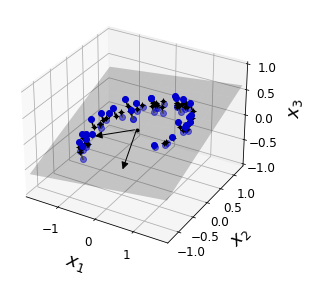</p>

* 위와 같은 데이터셋은 3차원 공간(고차원 공간) 내에서 거의 평면 형태(저차원 공간)로 데이터들이 배치되어있음.  이를 수직으로 투영하면 2차원 데이터셋을 얻음.
* 단, 스위스 롤 데이터셋처럼 투영이 항상 최선의 방법은 아님.

#### 매니폴드 학습

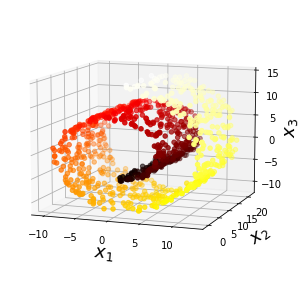

In [1]:
# from https://github.com/rickiepark/handson-ml2/blob/master/08_dimensionality_reduction.ipynb'

from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

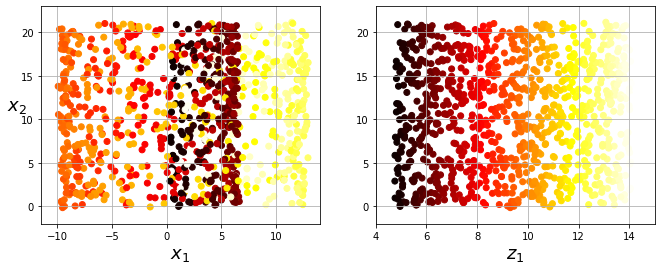

In [2]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

> * Swiss roll dataset
> * 단순히 x3축을 버리고 평면에 투영시키면 데이터들이 서로 뭉개짐.(오른쪽이 바람직.)

* 위와 같이 고차원 공간에서 휘어지거나 뒤틀린 2D 모양을 2D 매니폴드라고 함.
  * $d$차원 매니폴드 : 국부적으로 $d$차원 초평면으로 보일 수 있는 $n$차원 공간의 일부
* 대부분의 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝에 놓여 있다는 매니폴드 가정(manifold assumption, 또는 manifold hypothesis)에 근거하여, 많은 차원 축소 알고리즘들은 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동하고, 이를 매니폴드 학습(manifold learning)이라고 함.
* ex) 무작위로 생성된 이미지에서 손글씨 이미지는 매우 적게 발견될 것이므로, 손글씨 숫자 이미지를 만들 때 가능한 자유도는 아무 이미지나 생성할 때의 자유도보다 훨씬 낮음.
* 특히, 처리해야 할 작업이 저차원 매니폴드 공간에 표현되면 더 간단해질 것이라는 가정과 함께함.
  * 단, 저차원으로 표현 시 더 복잡해질 수도 있음.

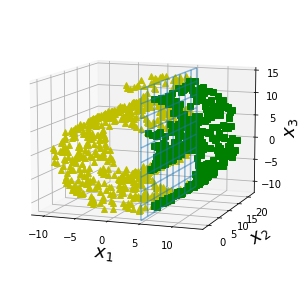

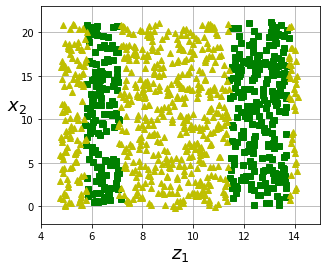

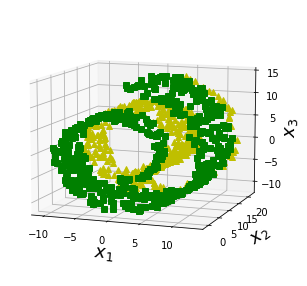

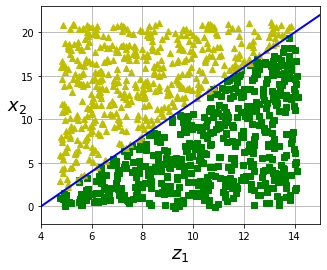

In [3]:
from matplotlib import gridspec
import numpy as np

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

> 1, 2번 그래프에서 3d 결정 경계는 단순하지만(하나의 평면) 2d 결정 경계는 복잡(여러 수직선). 즉, 차원을 축소하면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는 것은 아님.

### 분산 보존

* 저차원의 초평면에 데이터를 투영할 때에는 적절한 초평면을 선택해야 함.

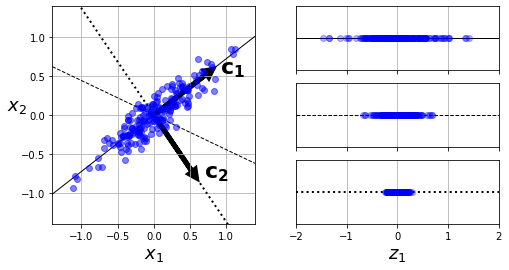

In [4]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

> 직선에 투영한 경우(오른쪽 맨 위)에는 분산이 그대로 보존되지만, 점선에 투영한 경우(오른쪽 맨 아래)에는 분산을 매우 적게 유지함.

* 저차원으로 투영 시, 분산이 최대한 보존되는 축을 선택하는 것이 정보 손실이 적음.
* 원본 데이터셋과 투영된 데이터 사이의 평균 제곱 거리를 최소화하는 축을 선택

* PCA : 훈련 세트에서 분산이 최대인 축을 찾음. 이후, 찾은 축에 직교하면서 분산을 최대한 유지하는 2번째 축을 찾음. 차원이 높다면, 세번째, 네번째... 축까지 찾음.
  * ex) 위의 예시에서는 순서대로 실선, 점선.
* $i$번째 축을 이 데이터의 $i$번째 주성분(principal component, PC)이라고 함.
  * ex) 위의 예시에서는 첫번째 주성분은 $c_1$, 두 번째 주성분은  $c_2$가 됨.
* 훈련 세트의 주성분을 찾을 때는 SVD 사용
* 훈련 세트 $ \mathbf{X} $ 를 $ \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T $로 분해했을 때, $ \mathbf{V} $안에 모든 주성분의 단위 벡터가 존재.
* PCA는 데이터셋의 평균이 0이라고 가정하므로 데이터를 원점에 맞춰야 함.
  * scikitlearn의 PCA는 자동으로 해당 작업을 함.

In [11]:
# numpy를 사용해 svd 계산
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2=Vt.T[:,1]

* 추출한 d개의 주성분으로 정의된 초평면에 데이터를 투영하여 d차원으로 축소시킬 수 있음.
* 해당 방법으로 축소 시, 분산을 최대한 보존하는 방향으로 투영하게 됨.
* d차원으로 축소된 데이터셋은 $\mathbf{X}_{\text{d-proj}}=\mathbf{X}\mathbf{W}_d $로 구할 수 있음.
  * $\mathbf{W}_d$ : $\mathbf{V}$의 첫 d열로 구성된 행렬

In [9]:
# 두 주성분으로 정의된 초평면에 데이터 투영
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [16]:
# scikitlearn을 이용한 PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # n_components : 주성분의 개수
X2D = pca.fit_transform(X)

> PCA변환기를 학습시킨 뒤에는 .components_에 $ \left(\mathbf{W}^d\right)^T $가 있음 (ex. 첫 번재 주성분 단위 벡터 = <code>pca.components_.T[:, 0]</code>)

* 설명된 분산 : 공분산 행렬($\mathbf{V}$)의 고윳값(eigenvalue). $\frac{\boldsymbol{\Sigma}^2}{n-1}$
* 설명된 분산값은 <code>explained_variance_</code>에 저장되고, 전체 분산에서 설명된 분산이 차지하는 비율인 설명된 분산의 비율(explained variance ratio)은 <code>explained_variance_ratio_</code>에 저장됨.

In [17]:
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

> 데이터셋 분산의 95%가 첫 번째 PC를 따라 놓여 있고, 분산의 4%는 두 번째 PC를 따라 놓여있다는 의미.

* 축소할 차원 수를 선택 시, 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단함.
  * 시각화를 위해 차원을 축소한다면 2개나 3개로 보통 줄임.

In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()             # n_components가 없으면 특성 수와 샘플 수 중 작은 값으로 결정됨.
pca.fit(X_train)        # 차원을 축소하지 않은 채로 PCA를 계산
cumsum = np.cumsum(pca.explained_variance_ratio_)   # cumsum : 입력 배열의 원소들을 차례대로 누적한 배열을 반환시킴.
d = np.argmax(cumsum >= 0.95) + 1                   # 즉, 전체 분산이 95%가 유지되는 최소한의 차원의 수를 계산.

In [19]:
d

154

In [20]:
pca = PCA(n_components=0.95)            # 여기서 n_components 보존하려는 분산의 비율
X_reduced = pca.fit_transform(X_train)

In [23]:
X_train[0].shape

(784,)

In [25]:
X_reduced[0].shape

(154,)

* 적절한 차원 수를 찾는 또 다른 방버은 설명된 분산을 차원 수에 대한 함수로 그리는 것(cumsum을 그래프로 그림)
* 해당 함수에서는 설명된 분산의 빠른 성장이 멈추는 변곡점이 존재함.

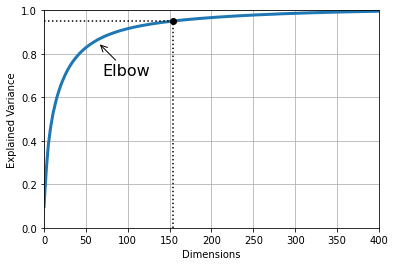

In [30]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

> 차원을 100으로 축소해도 분산을 크게 손해보지 않을 것. (약 90%)

* 차원을 축소하면 훈련 세트의 크기가 줄어듬
  * ex) 위의 MNIST예시에서는 784개의 특성에서 154개의 특성으로 줄어듦.
  * 즉, 대부분의 분산이 유지되지만 데이터셋은 원본 크기의 20%미만이 되었으며 분류 알고리즘의 속도를 증가시킬 수 있음.
* 축소된 데이터셋으로부터 원래 차원으로 복원도 가능. 단, 일부 정보는 손실되므로 원본 데이터와 동일한 데이터는 얻지 못하고 매우 비슷한 데이터만 얻을 수 있음.
* 원본 데이터와 재구섣된 데이터(압축 후 복원한 것) 사이의 평균 제곱 거리를 재구성 오차(reconstruction error)라고 함.

Text(0.5, 1.0, 'Compressed')

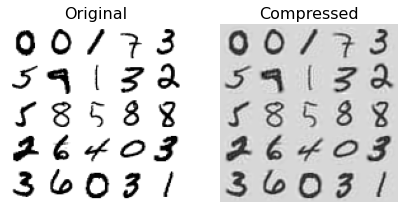

In [45]:
import matplotlib as mpl

pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

> 품질은 좀 떨어졌지만 숫자 모양은 온전한 상태

* 역변환 공식은 $\mathbf{X}_{\text{recovered}}=\mathbf{X}_{\text{d-proj}}\mathbf{W}_d^T $

* PCA의 매개변수 <code>svd_solver="randomized"</code>로 하면, 처음 d개의 주성분에 대한 근삿값을 빠르게 찾음. 이를 랜덤 PCA(Randomized PCA)라고 함.
* 완전한 SVD는 $O(m\times n^2)+O(n^3) $이고, randomized PCA는 $O(m\times d^2)+O(d^2) $이고, N보다 d가 작다면 randomized PCA가 훨씬 빠름. 
  * <code>svd_solver</code>의 기본값은 "auto", m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 랜덤 PCA 사용.
  * <code>svd_solver="full"</code>로 하면 강제로 완전한 SVD 사용

In [46]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

* PCA는 전체 훈련 세트를 메모리에 올려야 한다는 문제가 있으므로 점진적 PCA(incremental PCA, IPCA)를 사용할 수 있음.
* 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 하나씩 주입.
* 훈련 세트가 크거나, 실시간으로 새로운 데이터를 적용할 때 유용함.

In [48]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100     # mnist dataset을 100개의 미니배치로 나눔.
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)    # 전체 데이터셋을 사용하는 fit()대신 partial_fit() 사용

X_reduced = inc_pca.transform(X_train)

* 또는 하드디스크의 파일을 메모리에 올라온 것 처럼 쓸수 있는 memmap을 사용할 수 있음.

In [ ]:
# example code
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m,n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)